# 선형회귀 모델
출처 : 딥러닝을 위한 수학(아카이시 마사노리 지음, 신상재 옮김, 위키북스, 2019.3.)

In [1]:
# 필요 라이브러리 선언
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# PDF 출력
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
    
# 학습용 데이터 준비

x_org = housing.data[:2**14]
yt = housing.target[:2**14]                           # 주택 가격
feature_names = housing.feature_names
print('원본 데이터', x_org.shape, yt.shape)
print('항목 이름: ', feature_names)

print(x_org)

# 구역의 중간소득 Median Income(Medlnc) 데이터
x_data = x_org[:, feature_names.index('MedInc')]

print(x_data)
print('MedInc 데이터', x_data.shape)

# 더미 변수 추가
x_data = x_data.reshape(-1, 1)  # 2차원으로 reshape
x = np.insert(x_data, 0, 1.0, axis=1)

print('더미 변수 추가 후의 Medlnc 데이터', x.shape)

원본 데이터 (16384, 8) (16384,)
항목 이름:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   2.8523        4.            4.35344828 ...    1.41091954
    38.02       -121.3       ]
 [   2.375         4.            4.50485437 ...    5.77346278
    38.         -121.29      ]
 [   4.4871        2.            6.6907001  ...    3.47648903
    38.01       -121.29      ]]
[8.3252 8.3014 7.2574 ... 2.8523 2.375  4.4871]
MedInc 데이터 (16384,)
더미 변수 추가 후의 Medlnc 데이터 (16384, 2)


In [4]:
# 입력 데이터 x를 표시 (더미 변수 포함)
print(x.shape)
print(x[:10,:])

(16384, 2)
[[1.     8.3252]
 [1.     8.3014]
 [1.     7.2574]
 [1.     5.6431]
 [1.     3.8462]
 [1.     4.0368]
 [1.     3.6591]
 [1.     3.12  ]
 [1.     2.0804]
 [1.     3.6912]]


In [5]:
# 정답값 yt를 표시
print(yt[:10])

[4.526 3.585 3.521 3.413 3.422 2.697 2.992 2.414 2.267 2.611]


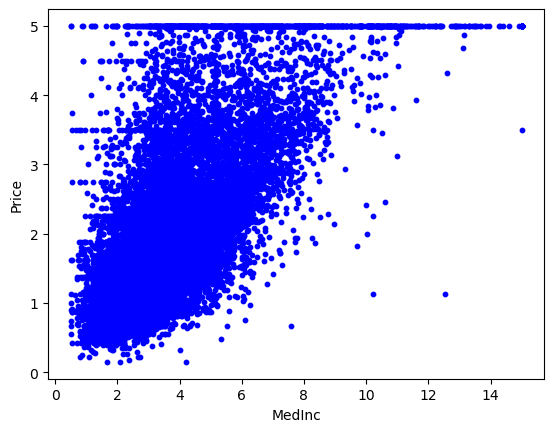

In [6]:
# 산점도를 표시 : 선형근사(linear approximation)
plt.scatter(x[:,1], yt, s=10, c='b')
plt.xlabel('MedInc', fontsize=10)
plt.ylabel('Price', fontsize=10)
plt.show()

In [7]:
# 예측함수 (1, x)의 값에서 예측값 yp를 계산 : yp = wo*1 + w1*x
def pred(x, w):
    return(x @ w)   # @는 벡터 x와 w의 내적(dot product)

In [8]:
# 초기화 처리


M = x.shape[0]             # 데이터 전체 건수(행의 갯수) : 16384


D = x.shape[1]             # 입력 데이터의 차수(열의 갯수, 더미 변수 포함) : 2


iters = 2000               # 반복 횟수


alpha = 0.01               # 학습률(learning rate)


w = np.ones(D)             # 가중치 벡터의 초깃값 (모든 값을 1로 한다) :"D"의 크기만큼의 1로 채워진 배열 "w"를 생성


history = np.zeros((0,2))   # 평가 결과 기록 (손실함수의 값만 기록)

print(D)
print(w)

2
[1. 1.]


In [9]:
# 반복 루프
for k in range(iters):
    
    
    yp = pred(x, w)                     # 예측값 계산 : yp = wo*1 + w1*x

    
    yd = yp - yt                        # 오차 계산                  

    
    w = w - alpha * (x.T @ yd) / M      # 경사하강법 적용 : 손실함수의 미분(x.T 는 x의 전치행렬)

    
    # 학습 곡선을 그리기 위한 데이터 계산 및 저장
    if (k % 100 == 0):
       
        loss = np.mean(yd ** 2) / 2                             # 손실함숫값의 계산 
        
        
        history = np.vstack((history, np.array([k, loss])))      # 계산 결과의 기록
        
        print( "iter = %d loss = %f" % (k, loss))
print("w0 = %f w1 = %f" % (w[0], w[1]))                           # 매개변수 최종값

iter = 0 loss = 4.830099
iter = 100 loss = 0.364103
iter = 200 loss = 0.361022
iter = 300 loss = 0.358903
iter = 400 loss = 0.357447
iter = 500 loss = 0.356445
iter = 600 loss = 0.355756
iter = 700 loss = 0.355283
iter = 800 loss = 0.354957
iter = 900 loss = 0.354733
iter = 1000 loss = 0.354579
iter = 1100 loss = 0.354474
iter = 1200 loss = 0.354401
iter = 1300 loss = 0.354351
iter = 1400 loss = 0.354316
iter = 1500 loss = 0.354293
iter = 1600 loss = 0.354276
iter = 1700 loss = 0.354265
iter = 1800 loss = 0.354258
iter = 1900 loss = 0.354252
w0 = 0.482169 w1 = 0.406183


In [10]:
# 최종 손실함수 초깃값, 최종값
print('손실함수 초깃값: %f' % history[0,1])
print('손실함수 최종값: %f' % history[-1,1])

손실함수 초깃값: 4.830099
손실함수 최종값: 0.354252


In [11]:
# 다음 직선을 그리기 위한 좌푯값 계산
xall = x[:,1].ravel()
xl = np.array([[1, xall.min()],[1, xall.max()]])
yl = pred(xl, w)
print("w0 = %f w1 = %f" % (w[0], w[1]))                           # 매개변수 최종값

w0 = 0.482169 w1 = 0.406183


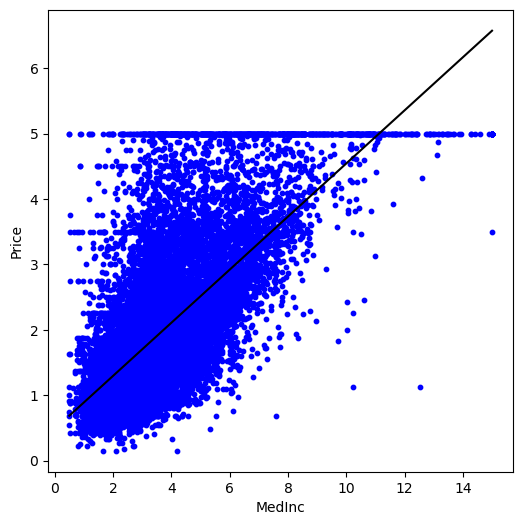

In [12]:
# 산점도와 회귀 직선 그리기
plt.figure(figsize=(6,6))
plt.scatter(x[:,1], yt, s=10, c='b')
plt.xlabel('MedInc', fontsize=10)
plt.ylabel('Price', fontsize=10)
plt.plot(xl[:,1], yl, c='k')
plt.show()

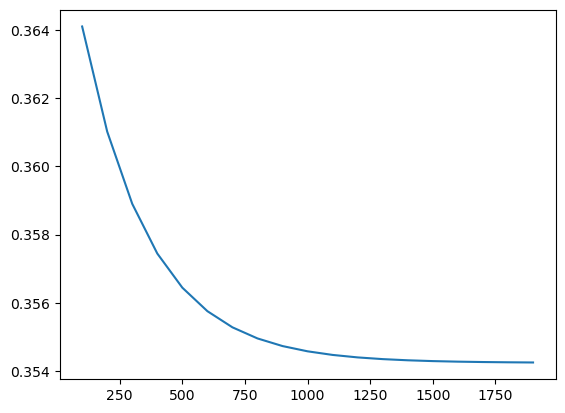

In [13]:
# 학습 곡선을 표시 (첫 1개분 제외)
plt.plot(history[1:,0], history[1:,1])
plt.show()